In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys

sys.path.append('../..')

from microfit.histogram import Histogram, HistogramGenerator, MultiChannelBinning, MultiChannelHistogram
from data_loading import load_runs

In [3]:
filename = "genie_universes.csv"

df = pd.read_csv(filename)
df

,universe,knob,knob_name,setting
0,0,0,MaCCQE,9.301230
1,0,1,CoulombCCQE,1.012680
2,0,2,MaNCEL,-0.676191
3,0,3,EtaNCEL,1.630890
4,0,4,NormCCMEC,0.131934
...,...,...,...,...
4595,99,41,FrAbs_N,1.555900
4596,99,42,RDecBR1gamma,-0.220943
4597,99,43,RDecBR1eta,-0.977129
4598,99,44,XSecShape_CCMEC,1.000000


In [4]:
central_value_df = pd.read_csv("genie_tuned_central_values.csv", index_col="knob_name")
central_value_df

,central_value
knob_name,
MaCCQE,4.97780
NormCCMEC,1.31189
XSecShape_CCMEC,1.00000
RPA_CCQE,0.15100
CoulombCCQE,0.00000
MaNCEL,0.00000
EtaNCEL,0.00000
NormNCMEC,0.00000
FracPN_CCMEC,0.00000


In [5]:
knob_names = df["knob_name"].unique()
# Make a new table where the columns are the knob names and the rows are the universes
universe_table = pd.DataFrame(columns=knob_names)
universe_table["universe"] = df["universe"].unique()
universe_table = universe_table.set_index("universe")
# Fill in the table with the "setting" column
for knob_name in knob_names:
    universe_table[knob_name] = df[df["knob_name"] == knob_name]["setting"].values
universe_table

,MaCCQE,CoulombCCQE,MaNCEL,EtaNCEL,NormCCMEC,NormNCMEC,FracPN_CCMEC,FracDelta_CCMEC,MaCCRES,MvCCRES,...,FrCEx_pi,FrInel_pi,FrAbs_pi,FrCEx_N,FrInel_N,FrAbs_N,RDecBR1gamma,RDecBR1eta,XSecShape_CCMEC,RPA_CCQE
universe,,,,,,,,,,,,,,,,,,,,,
0,9.30123,1.012680,-0.676191,1.630890,0.131934,-0.218476,-0.571217,-0.144778,0.442053,-0.179057,...,-0.249482,-0.649054,1.436590,0.166464,2.166710,1.218130,-0.116749,-0.886613,1.0,0.151
1,1.87951,-0.505197,-1.523720,-0.590569,0.042225,-1.302740,0.285126,-0.398092,1.734250,0.276196,...,-0.813496,-0.861713,1.367480,-1.202980,-1.474950,-0.450136,-1.842060,0.153761,1.0,0.151
2,-3.23048,2.648240,-0.827417,0.374072,-0.235210,1.183260,0.923708,0.031910,1.673070,0.522873,...,-0.102434,-1.875700,1.230720,-1.023800,0.482545,-1.100120,-1.016240,-1.169480,1.0,0.151
3,7.60767,-0.371268,0.735236,1.365060,1.261610,0.700334,0.346822,-1.417970,-0.485342,0.188120,...,0.000523,0.371760,-1.201590,1.106750,-0.639253,0.973355,0.158259,0.458671,1.0,0.151
4,2.69695,-0.247960,1.540520,-0.954769,0.495629,0.531475,-0.113693,0.129156,-0.677767,-0.974898,...,1.037870,-0.542200,-0.306110,-0.448468,-1.463630,0.970326,-0.427051,-0.359723,1.0,0.151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,7.21639,1.636530,-0.848771,-1.001680,3.392660,-3.673910,-0.640941,2.184100,0.576531,0.603387,...,0.643347,0.852451,0.912110,-2.413130,1.533750,-0.445688,0.654729,-0.080098,1.0,0.151
96,4.07461,-1.132500,-1.736630,-0.021920,1.479810,-3.310670,0.555260,0.429243,-0.181782,-1.789880,...,-1.251170,0.001130,-0.211874,-0.968582,0.728196,-1.810140,1.451660,1.090640,1.0,0.151
97,4.57909,1.110220,1.367280,-0.886335,2.288710,-2.989820,-0.526481,-0.550353,2.150230,-0.772440,...,1.186610,0.981543,-0.568016,-0.468315,-1.273180,0.194111,-0.361989,-1.420290,1.0,0.151


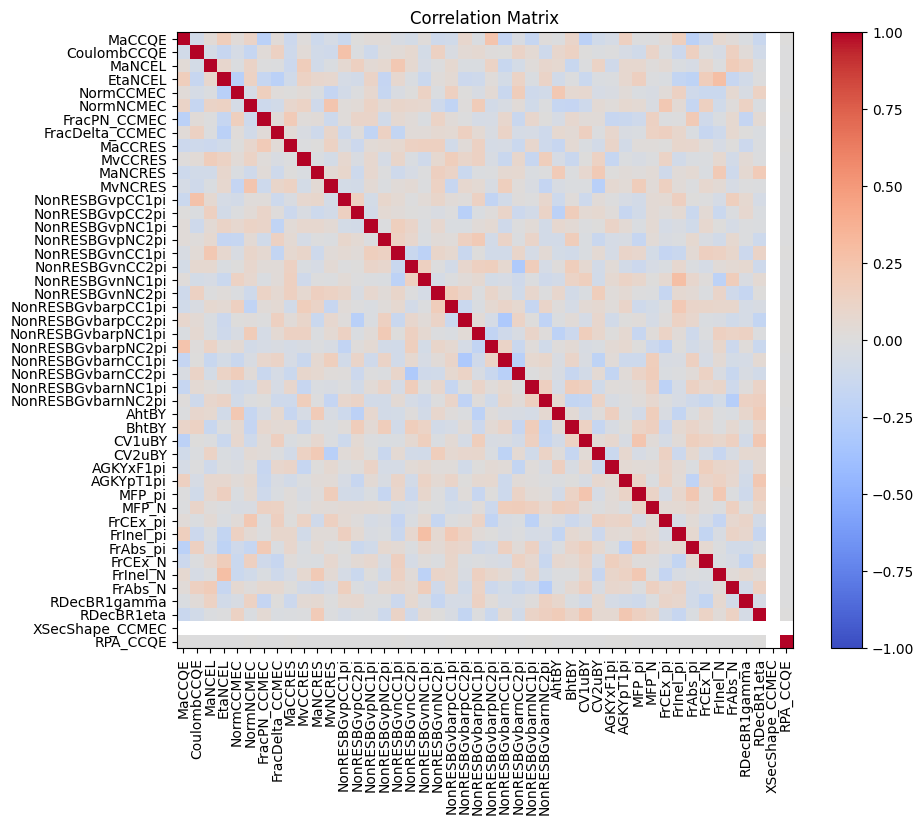

In [6]:
correlation_matrix = universe_table.corr()
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest', vmin=-1, vmax=1)
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix')
plt.show()


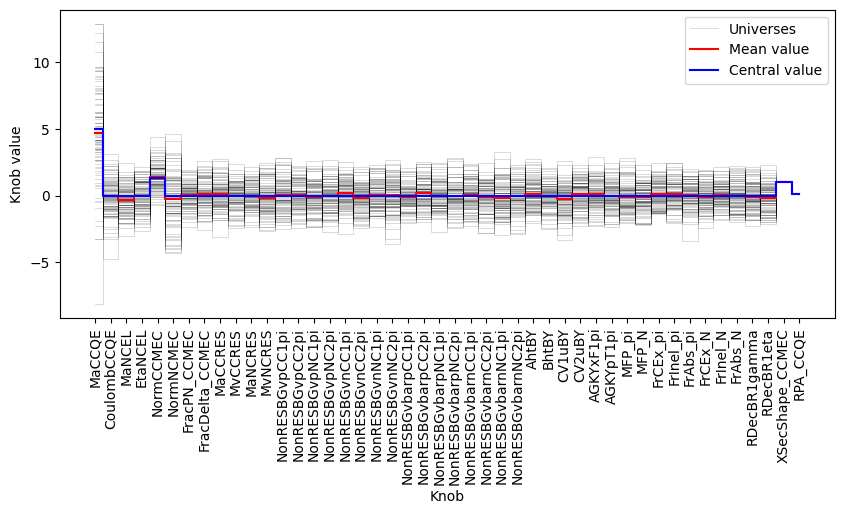

In [7]:
mean_values = universe_table.mean()
values = mean_values.values
indices = mean_values.index

central_values = central_value_df.loc[indices]
plt.figure(figsize=(10, 4))

add_label = True
for universe in universe_table.index:
    plt.step(indices, universe_table.loc[universe], color='black', alpha=0.2, lw=0.5, where="mid", label='Universes' if add_label else None, rasterized=True)
    add_label = False
plt.step(indices, values, where='mid', color='red', label='Mean value')
# Plot the central values as well
plt.step(indices, central_values.values, where='mid', color='blue', label='Central value')
plt.xlabel('Knob')
plt.ylabel('Knob value')
plt.xticks(rotation=90)
plt.legend()
plt.savefig("genie_knob_plots/knob_values.pdf", bbox_inches='tight')
# also save PNG version
plt.savefig("genie_knob_plots/knob_values.png", bbox_inches='tight')


In [8]:
df.pivot(index="universe", columns="knob_name", values="setting")

knob_name,AGKYpT1pi,AGKYxF1pi,AhtBY,BhtBY,CV1uBY,CV2uBY,CoulombCCQE,EtaNCEL,FrAbs_N,FrAbs_pi,...,NonRESBGvpCC1pi,NonRESBGvpCC2pi,NonRESBGvpNC1pi,NonRESBGvpNC2pi,NormCCMEC,NormNCMEC,RDecBR1eta,RDecBR1gamma,RPA_CCQE,XSecShape_CCMEC
universe,,,,,,,,,,,,,,,,,,,,,
0,0.651507,-0.140792,-1.186330,1.378400,0.735719,0.728241,1.012680,1.630890,1.218130,1.436590,...,-0.365909,-2.098480,0.887625,-0.544250,0.131934,-0.218476,-0.886613,-0.116749,0.151,1.0
1,-0.577692,-0.546800,-0.600500,0.405317,-1.739420,1.878030,-0.505197,-0.590569,-0.450136,1.367480,...,0.103972,-0.170545,0.904013,2.657980,0.042225,-1.302740,0.153761,-1.842060,0.151,1.0
2,0.336151,-1.709570,-1.355080,-1.415960,-1.414440,0.692779,2.648240,0.374072,-1.100120,1.230720,...,0.588585,-0.999663,-1.707670,0.103933,-0.235210,1.183260,-1.169480,-1.016240,0.151,1.0
3,-0.387437,0.283759,-1.034110,-0.121234,-0.506032,0.484511,-0.371268,1.365060,0.973355,-1.201590,...,-0.299517,1.560190,-1.376960,0.133283,1.261610,0.700334,0.458671,0.158259,0.151,1.0
4,0.578666,1.079010,-0.811073,-1.216310,0.804881,2.306770,-0.247960,-0.954769,0.970326,-0.306110,...,-0.245753,0.374872,0.682414,-0.729021,0.495629,0.531475,-0.359723,-0.427051,0.151,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-1.226490,-1.014450,-0.376235,-1.387460,0.010046,0.931591,1.636530,-1.001680,-0.445688,0.912110,...,0.768760,-1.117130,-1.925520,0.317476,3.392660,-3.673910,-0.080098,0.654729,0.151,1.0
96,1.067990,-0.411560,1.920820,1.881840,-0.296500,-1.571860,-1.132500,-0.021920,-1.810140,-0.211874,...,-1.215020,-0.424220,0.589757,0.500736,1.479810,-3.310670,1.090640,1.451660,0.151,1.0
97,-0.141965,1.179090,1.760290,-0.032965,-3.295110,-0.832247,1.110220,-0.886335,0.194111,-0.568016,...,0.840209,0.168086,-0.278642,-0.405482,2.288710,-2.989820,-1.420290,-0.361989,0.151,1.0


<AxesSubplot:xlabel='Global bin number', ylabel='Events'>

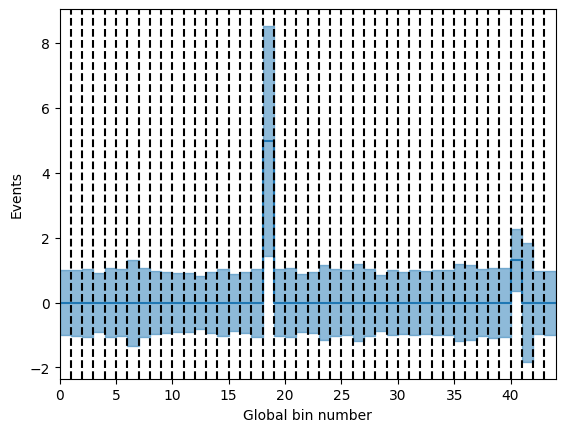

In [9]:
from typing import Optional, Tuple, Union, overload, Dict, List
from typing_extensions import Literal
from microfit.histogram import (
    HistogramGenerator,
    MultiChannelHistogram,
    MultiChannelBinning,
    Histogram,
    Binning,
)
from microfit.statistics import covariance


# We can now create a new histogram generator subclass that uses the MultiChannelHistogram class. 
# We treat every knob as a separate channel, meaning that the histogram for each knob has just one bin.
# When the `generate` method is called, the histogram will contain the mean values of the knob settings over all universes.
# When this generator creates multisim-histograms, the values will correspond to the knob settings.

class KnobHistogramGenerator(HistogramGenerator):
    def __init__(self, knob_settings_csv, central_value_csv=None):
        # Load knob settings from CSV file
        self.df = pd.read_csv(knob_settings_csv)
        self.knob_names = np.sort(self.df["knob_name"].unique())
        self.universe_knob_settings = self.df.pivot(index="universe", columns="knob_name", values="setting")
        self.covariance_matrix = self.universe_knob_settings.cov()
        # Remove all knobs where the covariance close to zero
        nonzero_knob_names = self.covariance_matrix.loc[:, np.any(self.covariance_matrix > 1e-16, axis=0)].columns
        # Print warning if some knobs are removed
        if len(nonzero_knob_names) < len(self.knob_names):
            print(f"Warning: Removed knobs with (near) zero covariance: {set(self.knob_names) - set(nonzero_knob_names)}")
        self.knob_names = nonzero_knob_names
        # index of this table is the knob name, the value the mean value of the knob setting
        self.mean_value_table = self.df.groupby("knob_name")["setting"].mean()
        # filter out the knobs that have zero covariance
        self.mean_value_table = self.mean_value_table.loc[self.knob_names]
        # Get the covariance matrix, also filtering the knobs
        self.covariance_matrix = self.covariance_matrix.loc[self.knob_names, self.knob_names].values
        
        self.binning = MultiChannelBinning(
            [Binning("var", bin_edges=[0, 1], label=knob_name) for knob_name in self.knob_names]
        )

        if central_value_csv is not None:
            self.central_value_df = pd.read_csv(central_value_csv, index_col="knob_name")
            self.central_values = self.central_value_df.loc[self.knob_names].squeeze()
            # If we have a given central value, the we can also use it to calculate the covariance matrix
            universe_histograms = []
            for universe in self.universe_knob_settings.index:
                universe_histograms.append(self.universe_knob_settings.loc[universe, self.knob_names].values)
            universe_histograms = np.array(universe_histograms)
            self.covariance_matrix = covariance(universe_histograms, self.central_values.values)
        else:
            self.central_values = self.mean_value_table.values
        
        # The following variable is used by the superclass. Setting it to None turns off the extra background
        # fractional error calculation for detector systematics.
        self.extra_background_fractional_error = None

    def calculate_multisim_uncertainties(
        self,
        multisim_weight_column: str,
        weight_rescale: float = 1 / 1000,
        weight_column: Optional[str] = None,
        central_value_hist: Optional[Union[Histogram, MultiChannelHistogram]] = None,
        extra_query: Optional[str] = None,
        return_histograms: bool = False,
    ) -> Union[np.ndarray, Tuple[np.ndarray, Optional[np.ndarray]]]:
        """Calculate multisim uncertainties for the knob settings.
        
        This function follows the same interface as that of the full histogram generator, but 
        doesn't actually use most of the arguments because they don't apply here. 
        The covariance matrix is always the one we calculated from the knob settings.
        If `return_histograms` is True, the function returns the individual histograms
        for each universe.
        """
        if multisim_weight_column != "weightsGenie":
            # Returning zeros here should ensure that we only add this covariance once when 
            # this function is used to calculate a joint covariance matrix
            if not return_histograms:
                return np.zeros((len(self.knob_names), len(self.knob_names)))
            n_universes = self.universe_knob_settings.shape[0]
            central_value_bin_counts = self.central_values
            # for any other column, we want to return the central value histogram for every universe,
            # to simulate the the absense of any effect of this systematic uncertainty
            return np.zeros((len(self.knob_names), len(self.knob_names))), np.tile(central_value_bin_counts, (n_universes, 1))

        if not return_histograms:
            return self.covariance_matrix

        histograms = []
        for universe in self.universe_knob_settings.index:
            histograms.append(self.universe_knob_settings.loc[universe, self.knob_names].values)
        return self.covariance_matrix, np.array(histograms)

    def calculate_unisim_uncertainties(self,
        central_value_hist: Optional[Histogram] = None,
        extra_query: Optional[str] = None,
        return_histograms: bool = False,
        skip_covariance: bool = False,
    ) -> Optional[Union[np.ndarray, Tuple[np.ndarray, Dict[str, np.ndarray]]]]:
        """Calculate the unisim uncertainties for the knob settings.
        
        This function is essentially just a stub to fulfill the interface requirements of the
        HistogramGenerator class. We do not have unisim uncertainties for the knob settings.
        Therefore, this function just returns a covariance matrix of zeros and universe 
        histograms that are identical to the central values.
        """

        knob_v = [
            "knobRPA",
            "knobCCMEC",
            "knobAxFFCCQE",
            "knobVecFFCCQE",
            "knobDecayAngMEC",
            "knobThetaDelta2Npi",
        ]
        # see table 23 from the technote
        knob_n_universes = [2, 1, 1, 1, 1, 1]
        total_cov = np.zeros((self.binning.n_bins, self.binning.n_bins))
        observation_dict = dict()
        for knob, n_universes in zip(knob_v, knob_n_universes):
            observations = []
            for i in range(n_universes):
                observations.append(self.central_values)
            observations = np.array(observations)
            observation_dict[knob] = observations
        if return_histograms:
            return total_cov, observation_dict
        return total_cov

    def calculate_detector_covariance(
        self,
        only_diagonal: bool = False,
        fractional: bool = True,
        smooth_variations: bool = True,
        include_variations: Optional[List[str]] = None,
        extra_query: Optional[str] = None,
        return_histograms: bool = False,
    ) -> Optional[Union[np.ndarray, Tuple[np.ndarray, Dict[str, np.ndarray]]]]:
        """Calculate the detector covariance matrix for the knob settings.
        
        Just as with the unisim variations, this function is just a stub to fulfill the interface
        requirements of the HistogramGenerator class. We do not have detector variations for the knob settings.
        Therefore, this function just returns a covariance matrix of zeros and universe variations that are
        also identical to zero.
        """

        if return_histograms and include_variations is None:
            # Since we do not have detector variation data, it is necessary that this is passed in 
            # as an argument. It is necessary such that the output dictionary has the correct keys.
            raise ValueError("include_variations must be set when return_histograms is True")

        total_cov = np.zeros((self.binning.n_bins, self.binning.n_bins))
        # In contrast to the unisim variations, the output histograms are expected to be the 
        # difference with respect to the central value.
        variation_diffs = dict((var, np.zeros(self.binning.n_bins)) for var in include_variations)
        if return_histograms:
            return total_cov, variation_diffs
        return total_cov

    def generate(self, include_multisim_uncertainties=False, **kwargs):
        if not include_multisim_uncertainties:
            return MultiChannelHistogram(self.binning, bin_counts=self.central_values, uncertainties=np.zeros_like(self.central_values))
        return MultiChannelHistogram(self.binning, bin_counts=self.central_values, covariance_matrix=self.covariance_matrix)

# Now we can create an instance of this generator and generate a histogram
knob_histogram_generator = KnobHistogramGenerator("genie_universes.csv", "genie_tuned_central_values.csv")
knob_histogram = knob_histogram_generator.generate(include_multisim_uncertainties=True)
knob_histogram.draw(show_channel_labels=False, allow_negative=True)

<AxesSubplot:xlabel='Global bin number', ylabel='Events'>

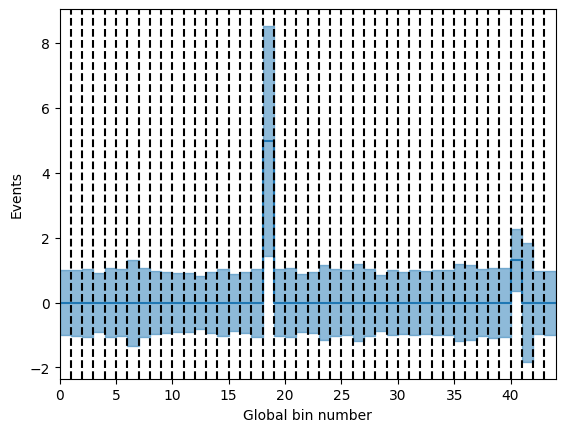

In [10]:
knob_hist = HistogramGenerator.generate_joint_histogram(
    [knob_histogram_generator], 
    include_unisim_errors=False,
    ms_columns=["weightsGenie"]
)
knob_hist.draw(show_channel_labels=False, allow_negative=True)

<AxesSubplot:title={'center':'Correlation matrix'}>

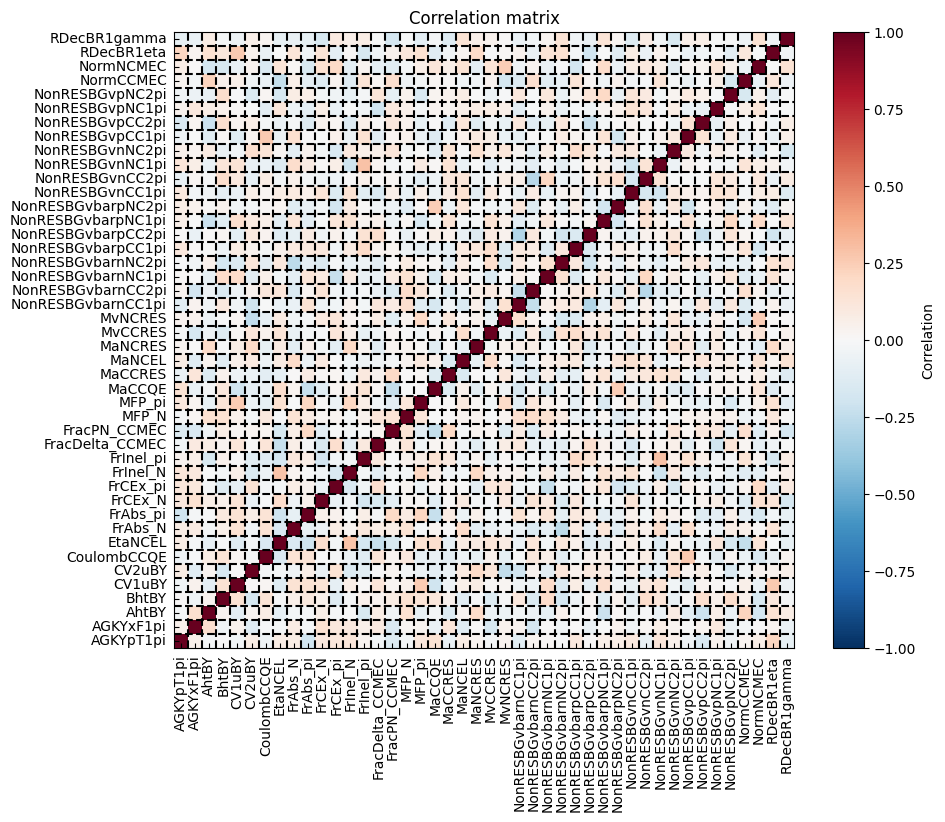

In [11]:
fig, ax = plt.subplots(figsize=(10, 8))
knob_histogram.draw_covariance_matrix(ax=ax, label_rotations={"x": 90, "y": 0})

In [12]:
from microfit.statistics import covariance

central_values = knob_histogram_generator.generate().bin_counts
cov, observations = knob_histogram_generator.calculate_multisim_uncertainties("weightsGenie", return_histograms=True)

n_universes = len(observations)
cov_with_cv = covariance(observations, central_values)

# check if cov a and cov_with_cv are the same
print((cov - cov_with_cv) / cov)
print((cov - cov_with_cv)[0, 0] / cov[0, 0])
print(np.allclose(cov, cov_with_cv))

[[ 0.  0. -0. ...  0.  0. -0.]
 [ 0.  0.  0. ...  0.  0. -0.]
 [-0.  0.  0. ... -0.  0.  0.]
 ...
 [ 0.  0. -0. ...  0. -0.  0.]
 [ 0.  0.  0. ... -0.  0. -0.]
 [-0. -0.  0. ...  0. -0.  0.]]
0.0
True


In [13]:
RUN = ["1", "2", "3_nocrt", "3_crt", "4b","4c","4d","5"]
# RUN = ["5"]
signal_rundata, signal_mc_weights, signal_data_pot = load_runs(
    RUN,
    data="bnb",  # which data to load
    # truth_filtered_sets=["nue", "drt", "nc_pi0", "cc_pi0", "cc_nopi", "cc_cpi", "nc_nopi", "nc_cpi"],
    # Which truth-filtered MC sets to load in addition to the main MC set. At least nu_e and dirt
    # are highly recommended because the statistics at the final level of the selection are very low.
    truth_filtered_sets=["nue", "drt"],
    # Choose which additional variables to load. Which ones are required may depend on the selection
    # you wish to apply.
    loadpi0variables=True,
    loadshowervariables=True,
    loadrecoveryvars=True,
    loadsystematics=True,
    load_crt_vars=True,
    # Load the nu_e set one more time with the LEE weights applied
    load_lee=False,
    # With the cache enabled, by default the loaded dataframes will be stored as HDF5 files
    # in the 'cached_dataframes' folder. This will speed up subsequent loading of the same data.
    enable_cache=True,
    blinded=False,
    use_new_signal_model=False,
)

Loading run 1


Loading run 2
Loading run 3_nocrt
Loading run 3_crt
Loading run 4b
Loading run 4c
Loading run 4d
Loading run 5


In [14]:
from microfit.histogram import Binning, MultiChannelBinning

binning_def = ("reco_e", 17, (0.01, 2.39), r"Reconstructed Energy [GeV]")
binning_np_ext = Binning.from_config(*binning_def)
binning_np_ext.set_selection(preselection="NP", selection="NPBDT")
binning_np_ext.label = "NPBDT"

binning_zp_ext = Binning.from_config(*binning_def)
binning_zp_ext.set_selection(preselection="ZP", selection="ZPBDT_CRT")
binning_zp_ext.label = "ZPBDT"

# binning_zp_ext_nocrt = Binning.from_config(*binning_def)
# binning_zp_ext_nocrt.set_selection(preselection="ZP", selection="ZPBDT")
# binning_zp_ext_nocrt.label = "ZPBDT_NOCRT"

signal_binning = MultiChannelBinning([binning_np_ext, binning_zp_ext])  #, binning_zp_ext_nocrt])

In [15]:
from microfit.fileio import from_json
from microfit.histogram import RunHistGenerator

detsys_data_path = "/nashome/a/atrettin/PELEE/old_model_ana_ext_bin_range_output/detvar_cache/run_123_nocrt3_crt4b4c4d5_NPBDT_ZPBDT_ZPBDT_NOCRT_bnb_(mcf_pass_ncpi0_eqeq_1_or_(abs(nu_pdg)_eqeq_12_and_ccnc_eqeq_0)).json"

signal_generator = RunHistGenerator(
    signal_rundata,
    signal_binning,
    data_pot=signal_data_pot,
    detvar_data=from_json(detsys_data_path),
)

../../microfit/run_plotter.py:127: UserWarning: No signal category found in the MC hists. Not separating signal.
  warnings.warn("No signal category found in the MC hists. Not separating signal.")


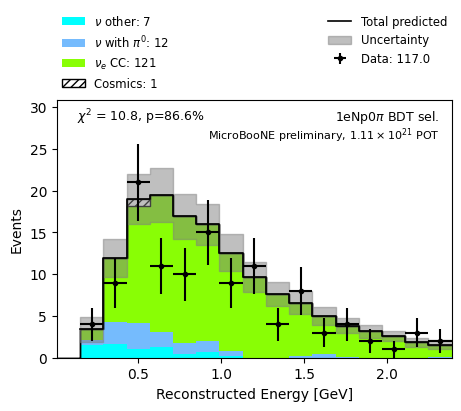

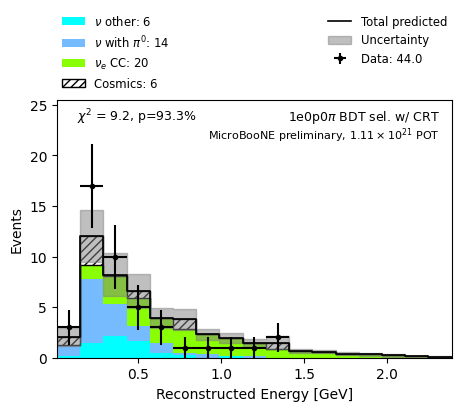

In [16]:
from matplotlib import pyplot as plt
from microfit.run_plotter import RunHistPlotter

for channel in signal_generator.channels:
    fig, ax = plt.subplots(figsize=(4.5, 4), constrained_layout=True)
    ax = RunHistPlotter(signal_generator).plot(
        category_column="paper_category", 
        include_multisim_errors=True,
        show_chi_square=True,
        show_data_mc_ratio=False,
        add_ext_error_floor=False,
        add_precomputed_detsys=True,
        ax=ax,
        channel=channel,
        legend_cols=2
    )

In [17]:
class EmptyHistGenerator(HistogramGenerator):
    def __init__(self, binning):
        """An empty histogram generator that generates histograms with zero counts and uncertainties.
        """
        self.binning = binning
        self.extra_background_fractional_error = None
    def generate(self, include_multisim_uncertainties=False, **kwargs):
        return MultiChannelHistogram(self.binning, bin_counts=np.zeros(self.binning.n_bins), uncertainties=np.zeros(self.binning.n_bins))

In [18]:
signal_mc_generator = signal_generator.get_hist_generator(which="mc")
signal_data_generator = signal_generator.get_hist_generator(which="data")
signal_ext_generator = signal_generator.get_hist_generator(which="ext")

empty_knob_histogram_generator = EmptyHistGenerator(knob_histogram.binning)

mc_hist_generators = [signal_mc_generator, knob_histogram_generator]
# We do not have EXT for the knob histogram, so we just use an empty histogram generator
ext_hist_generators = [signal_ext_generator, empty_knob_histogram_generator]

joint_mc_histogram = HistogramGenerator.generate_joint_histogram(mc_hist_generators, include_unisim_errors=True, add_precomputed_detsys=True)
joint_ext_histogram = HistogramGenerator.generate_joint_histogram(ext_hist_generators, include_multisim_errors=False)
joint_total_prediction = joint_mc_histogram + joint_ext_histogram

signal_prediction = joint_total_prediction[signal_binning.channels]
signal_data = signal_data_generator.generate()

<AxesSubplot:xlabel='Global bin number', ylabel='Events'>

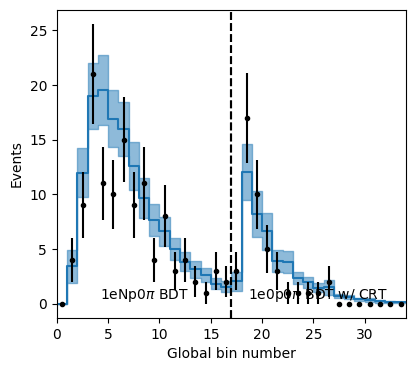

In [19]:
fig, ax = plt.subplots(figsize=(4.5, 4))
signal_prediction.draw(ax=ax, label="total prediction", show_channel_labels=False)
signal_data.draw(ax=ax, label="data", as_errorbars=True, color="k")

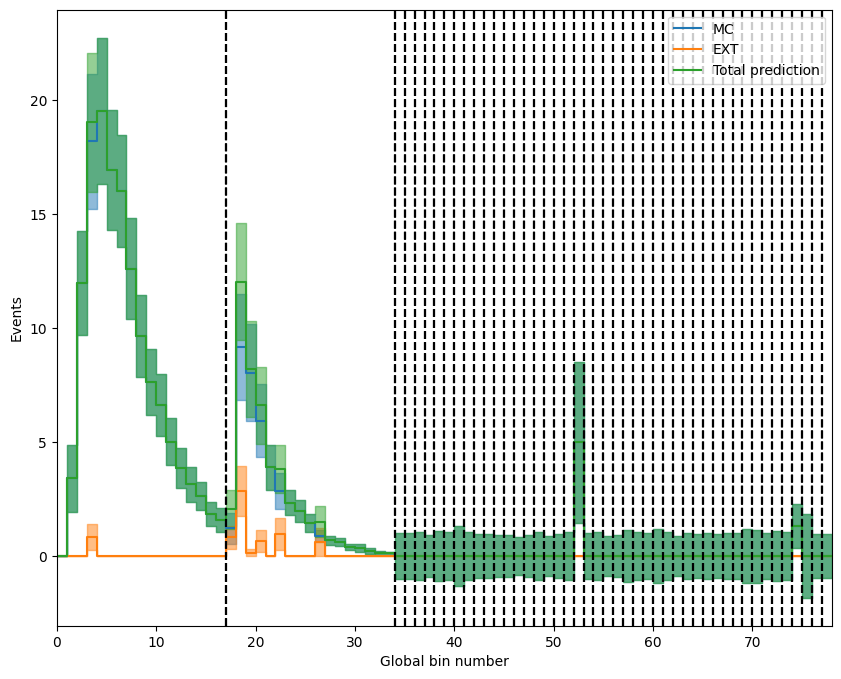

In [20]:
fig, ax = plt.subplots(figsize=(10, 8))
joint_mc_histogram.draw(ax=ax, show_channel_labels=False, allow_negative=True, label="MC")
joint_ext_histogram.draw(ax=ax, show_channel_labels=False, allow_negative=True, label="EXT")
joint_total_prediction.draw(ax=ax, show_channel_labels=False, allow_negative=True, label="Total prediction")
ax.legend(loc="upper right")

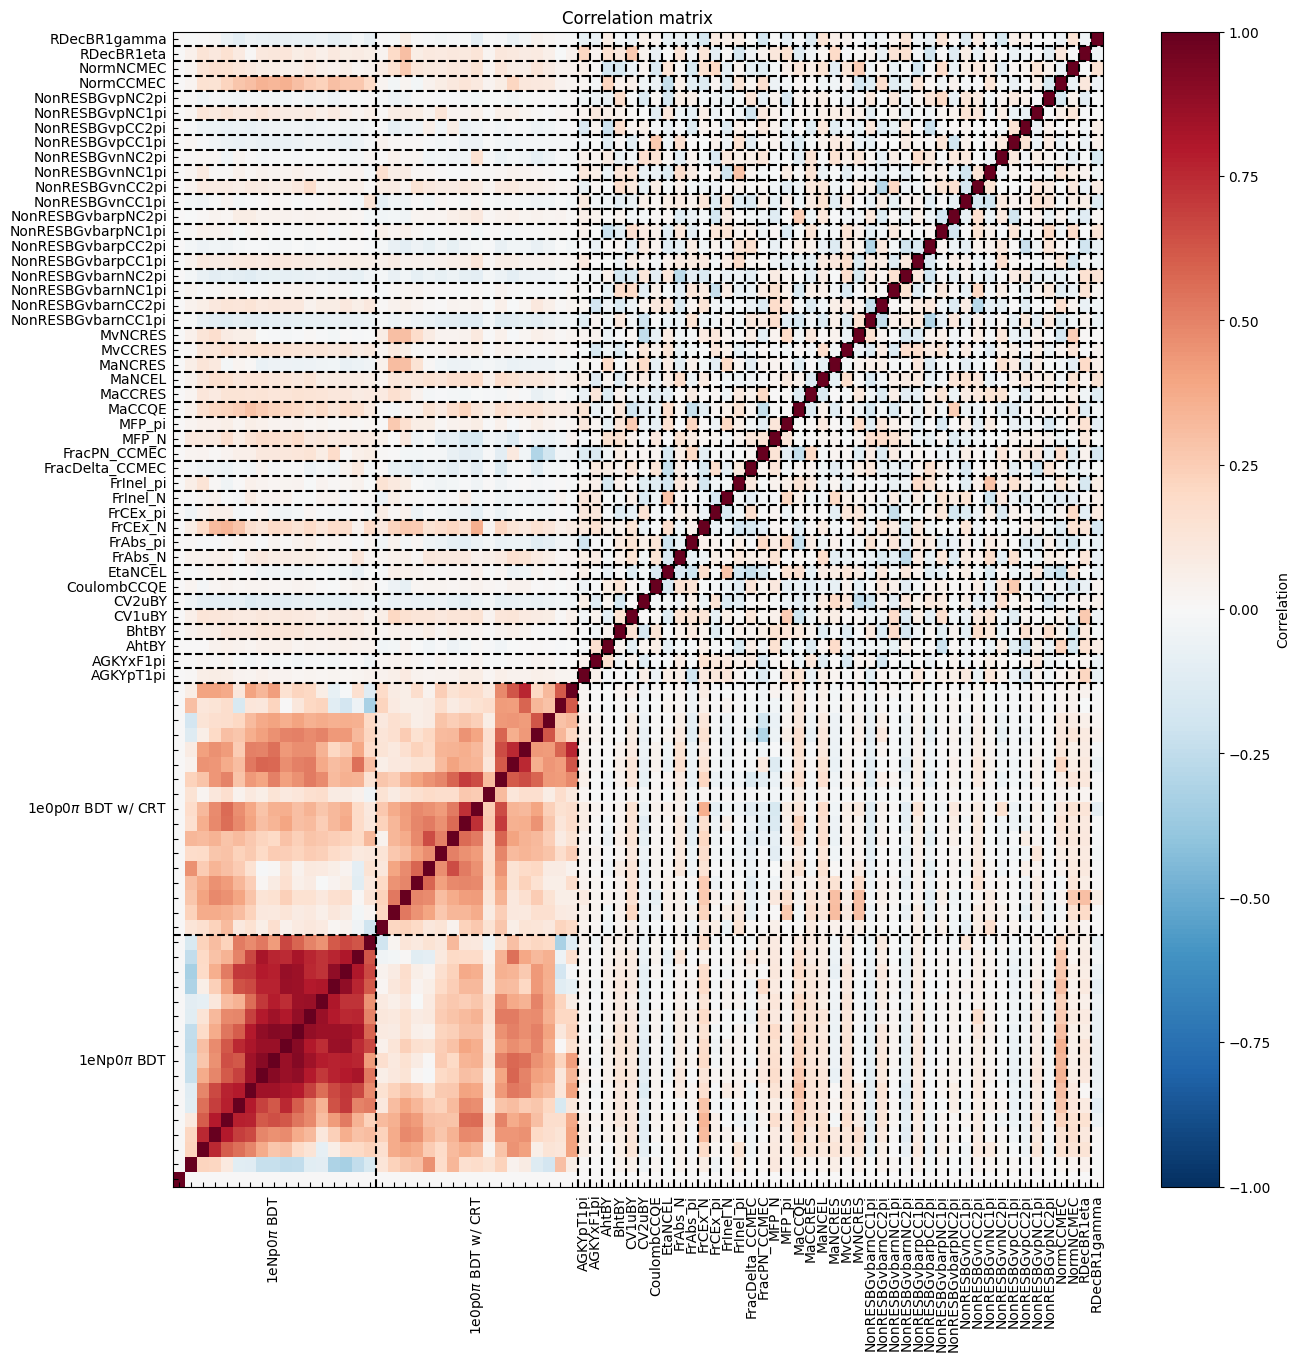

In [21]:
fig, ax = plt.subplots(figsize=(15, 15))
joint_total_prediction.draw_covariance_matrix(ax=ax, label_rotations={"x": 90, "y": 0})
fig.savefig("genie_knob_plots/joint_covariance_matrix.pdf", bbox_inches='tight')
fig.savefig("genie_knob_plots/joint_covariance_matrix.png", bbox_inches='tight')

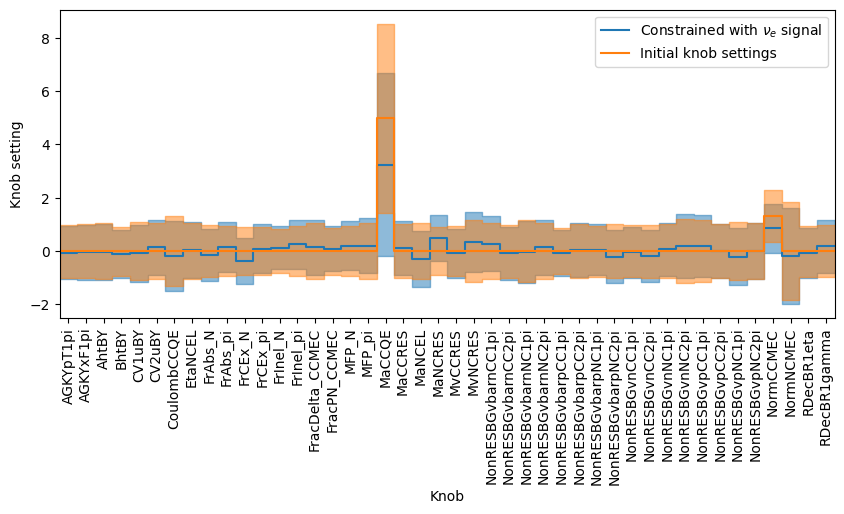

In [22]:
knobs_constrained = joint_total_prediction.update_with_measurement(signal_data)

fig, ax = plt.subplots(figsize=(10, 4))
knobs_constrained.draw(ax=ax, show_channel_labels=False, allow_negative=True, label="Constrained with $\\nu_e$ signal", show_channel_dividers=False)
knob_histogram.draw(ax=ax, show_channel_labels=False, allow_negative=True, label="Initial knob settings", show_channel_dividers=False)
ax.legend(loc="upper right")
ax.set_xticks(np.arange(len(knob_histogram.binning.channels)) + 0.5)
ax.set_xticklabels(knob_histogram_generator.knob_names, rotation=90)
ax.set_xlabel("Knob")
ax.set_ylabel("Knob setting")

fig.savefig("genie_knob_plots/knob_constrained_with_signal.pdf", bbox_inches='tight')
# also save PNG version
fig.savefig("genie_knob_plots/knob_constrained_with_signal.png", bbox_inches='tight')

In [23]:
ncpi0_data, ncpi0_mc_weights, ncpi0_data_pot = load_runs(
    run_numbers = ["3_crt", "4b", "4c", "4d","5"],
    data = "bnb",
    truth_filtered_sets = ["nue", "drt"],
    loadpi0variables = True,
    loadshowervariables = True,
    loadrecoveryvars = False,
    loadsystematics = True,
    load_crt_vars = True,
    load_lee = False,
    enable_cache = True,
    blinded = False,
    overwrite=False
)
ncpi0_binning = Binning.from_config("reco_e", 10, (0.15, 1.0), "Reconstructed neutrino energy (GeV)")
ncpi0_binning.set_selection("ZPLOOSESELTWOSHR", "ZPTwoShrCRT")
ncpi0_binning.label = "TWOSHR"
ncpi0_binning.variable_tex = "Reconstructed neutrino energy (GeV)"
ncpi0_binning.variable_tex_short = "$E_{\\mathrm{reco}}$"
ncpi0_binning.selection_tex = "NC $\\pi^0$ sel."
ncpi0_binning.selection_tex_short = "NC $\\pi^0$"

Loading run 3_crt
Loading run 4b
Loading run 4c
Loading run 4d
Loading run 5


In [24]:
from microfit.fileio import from_json
detvar_data_path = "/nashome/a/atrettin/PELEE/old_model_ana_ext_bin_range_output/detvar_cache/run_3_crt4b4c4d5_TWOSHR_bnb.json"

ncpi0_generator = RunHistGenerator(
    ncpi0_data,
    MultiChannelBinning([ncpi0_binning]),
    data_pot=ncpi0_data_pot,
    detvar_data=from_json(detvar_data_path),
)

../../microfit/run_plotter.py:127: UserWarning: No signal category found in the MC hists. Not separating signal.
  warnings.warn("No signal category found in the MC hists. Not separating signal.")


(<AxesSubplot:xlabel='Global bin number', ylabel='Events'>, None)

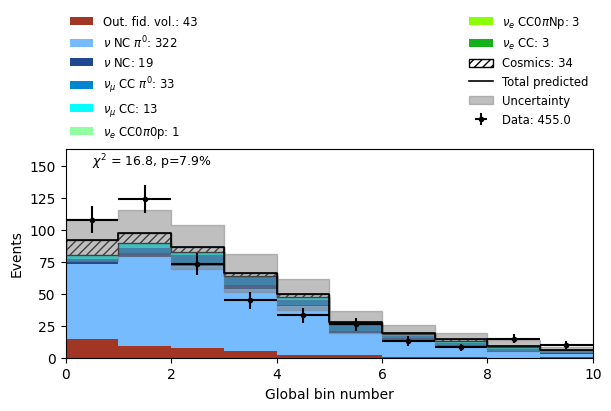

In [25]:
RunHistPlotter(ncpi0_generator).plot(
    category_column="category",
    include_multisim_errors=True,
    show_chi_square=True,
    show_data_mc_ratio=False,
    add_ext_error_floor=False,
    add_precomputed_detsys=True,
    legend_cols=2
)

In [26]:
muon_data, muon_mc_weights, muon_data_pot = load_runs(
    run_numbers = ["3_crt", "4b", "4c", "4d","5"],
    data = "bnb",
    truth_filtered_sets = ["nue", "drt"],
    loadshowervariables = False,
    loadsystematics = True,
    use_bdt = False,
    loadnumuvariables = True,
    load_crt_vars = True,
    numupresel = True,
    enable_cache = True,
    blinded = False,
    overwrite=False
)

Loading run 3_crt


Loading run 4b
Loading run 4c
Loading run 4d
Loading run 5


In [27]:
binning_def = ("neutrino_energy", 14, (0.15, 1.55), "Reconstructed neutrino energy (GeV)")
numu_np_binning = Binning.from_config(*binning_def)
numu_np_binning.set_selection(preselection="NUMUCRT", selection="NUMUCRTNP0PI")
numu_np_binning.label = "NUMUCRTNP0PI"

numu_zp_binning = Binning.from_config(*binning_def)
numu_zp_binning.set_selection(preselection="NUMUCRT", selection="NUMUCRT0P0PI")
numu_zp_binning.label = "NUMUCRT0P0PI"

numu_binning = MultiChannelBinning([numu_np_binning, numu_zp_binning])

In [28]:
detvar_data_path = "/nashome/a/atrettin/PELEE/old_model_ana_ext_bin_range_output/detvar_cache/run_3_crt4b4c4d5_NUMUCRTNP0PI_NUMUCRT0P0PI_NUMUCRT_bnb.json"

numu_generator = RunHistGenerator(
    muon_data,
    numu_binning,
    data_pot=muon_data_pot,
    detvar_data=from_json(detvar_data_path),
)

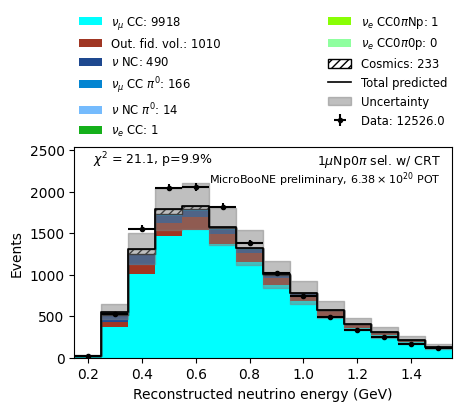

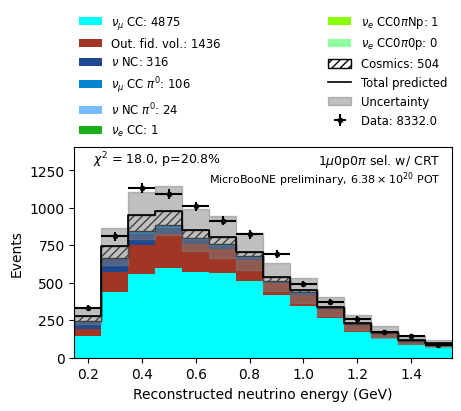

In [29]:
for channel in numu_generator.channels:
    fig, ax = plt.subplots(figsize=(4.5, 4), constrained_layout=True)
    ax = RunHistPlotter(numu_generator).plot(
        category_column="category", 
        include_multisim_errors=True,
        show_chi_square=True,
        show_data_mc_ratio=False,
        add_ext_error_floor=False,
        add_precomputed_detsys=True,
        ax=ax,
        channel=channel,
        legend_cols=2
    )

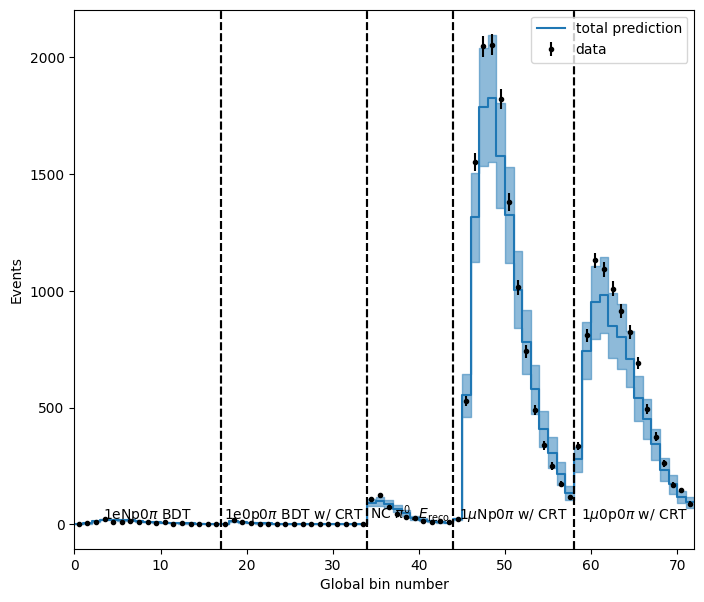

In [30]:
mc_hist_generators = [
    signal_mc_generator,
    ncpi0_generator.get_hist_generator(which="mc"),
    numu_generator.get_hist_generator(which="mc"),
    knob_histogram_generator,
]
ext_hist_generators = [
    signal_ext_generator,
    ncpi0_generator.get_hist_generator(which="ext"),
    numu_generator.get_hist_generator(which="ext"),
    empty_knob_histogram_generator,
]
data_generators = [
    signal_data_generator,
    ncpi0_generator.get_hist_generator(which="data"),
    numu_generator.get_hist_generator(which="data"),
]

joint_mc_histogram = HistogramGenerator.generate_joint_histogram(mc_hist_generators, include_unisim_errors=True, add_precomputed_detsys=True)
joint_ext_histogram = HistogramGenerator.generate_joint_histogram(ext_hist_generators, include_multisim_errors=False)
joint_total_prediction = joint_mc_histogram + joint_ext_histogram

data_histogram = HistogramGenerator.generate_joint_histogram(data_generators, include_multisim_errors=False)

fig, ax = plt.subplots(figsize=(8, 7))
joint_total_prediction[data_histogram.channels].draw(ax=ax, label="total prediction", show_channel_labels=False)
data_histogram.draw(ax=ax, label="data", as_errorbars=True, color="k")
ax.legend(loc="upper right")
# ax.set_yscale("log")
# ax.set_ylim(1e-1, 5e3)

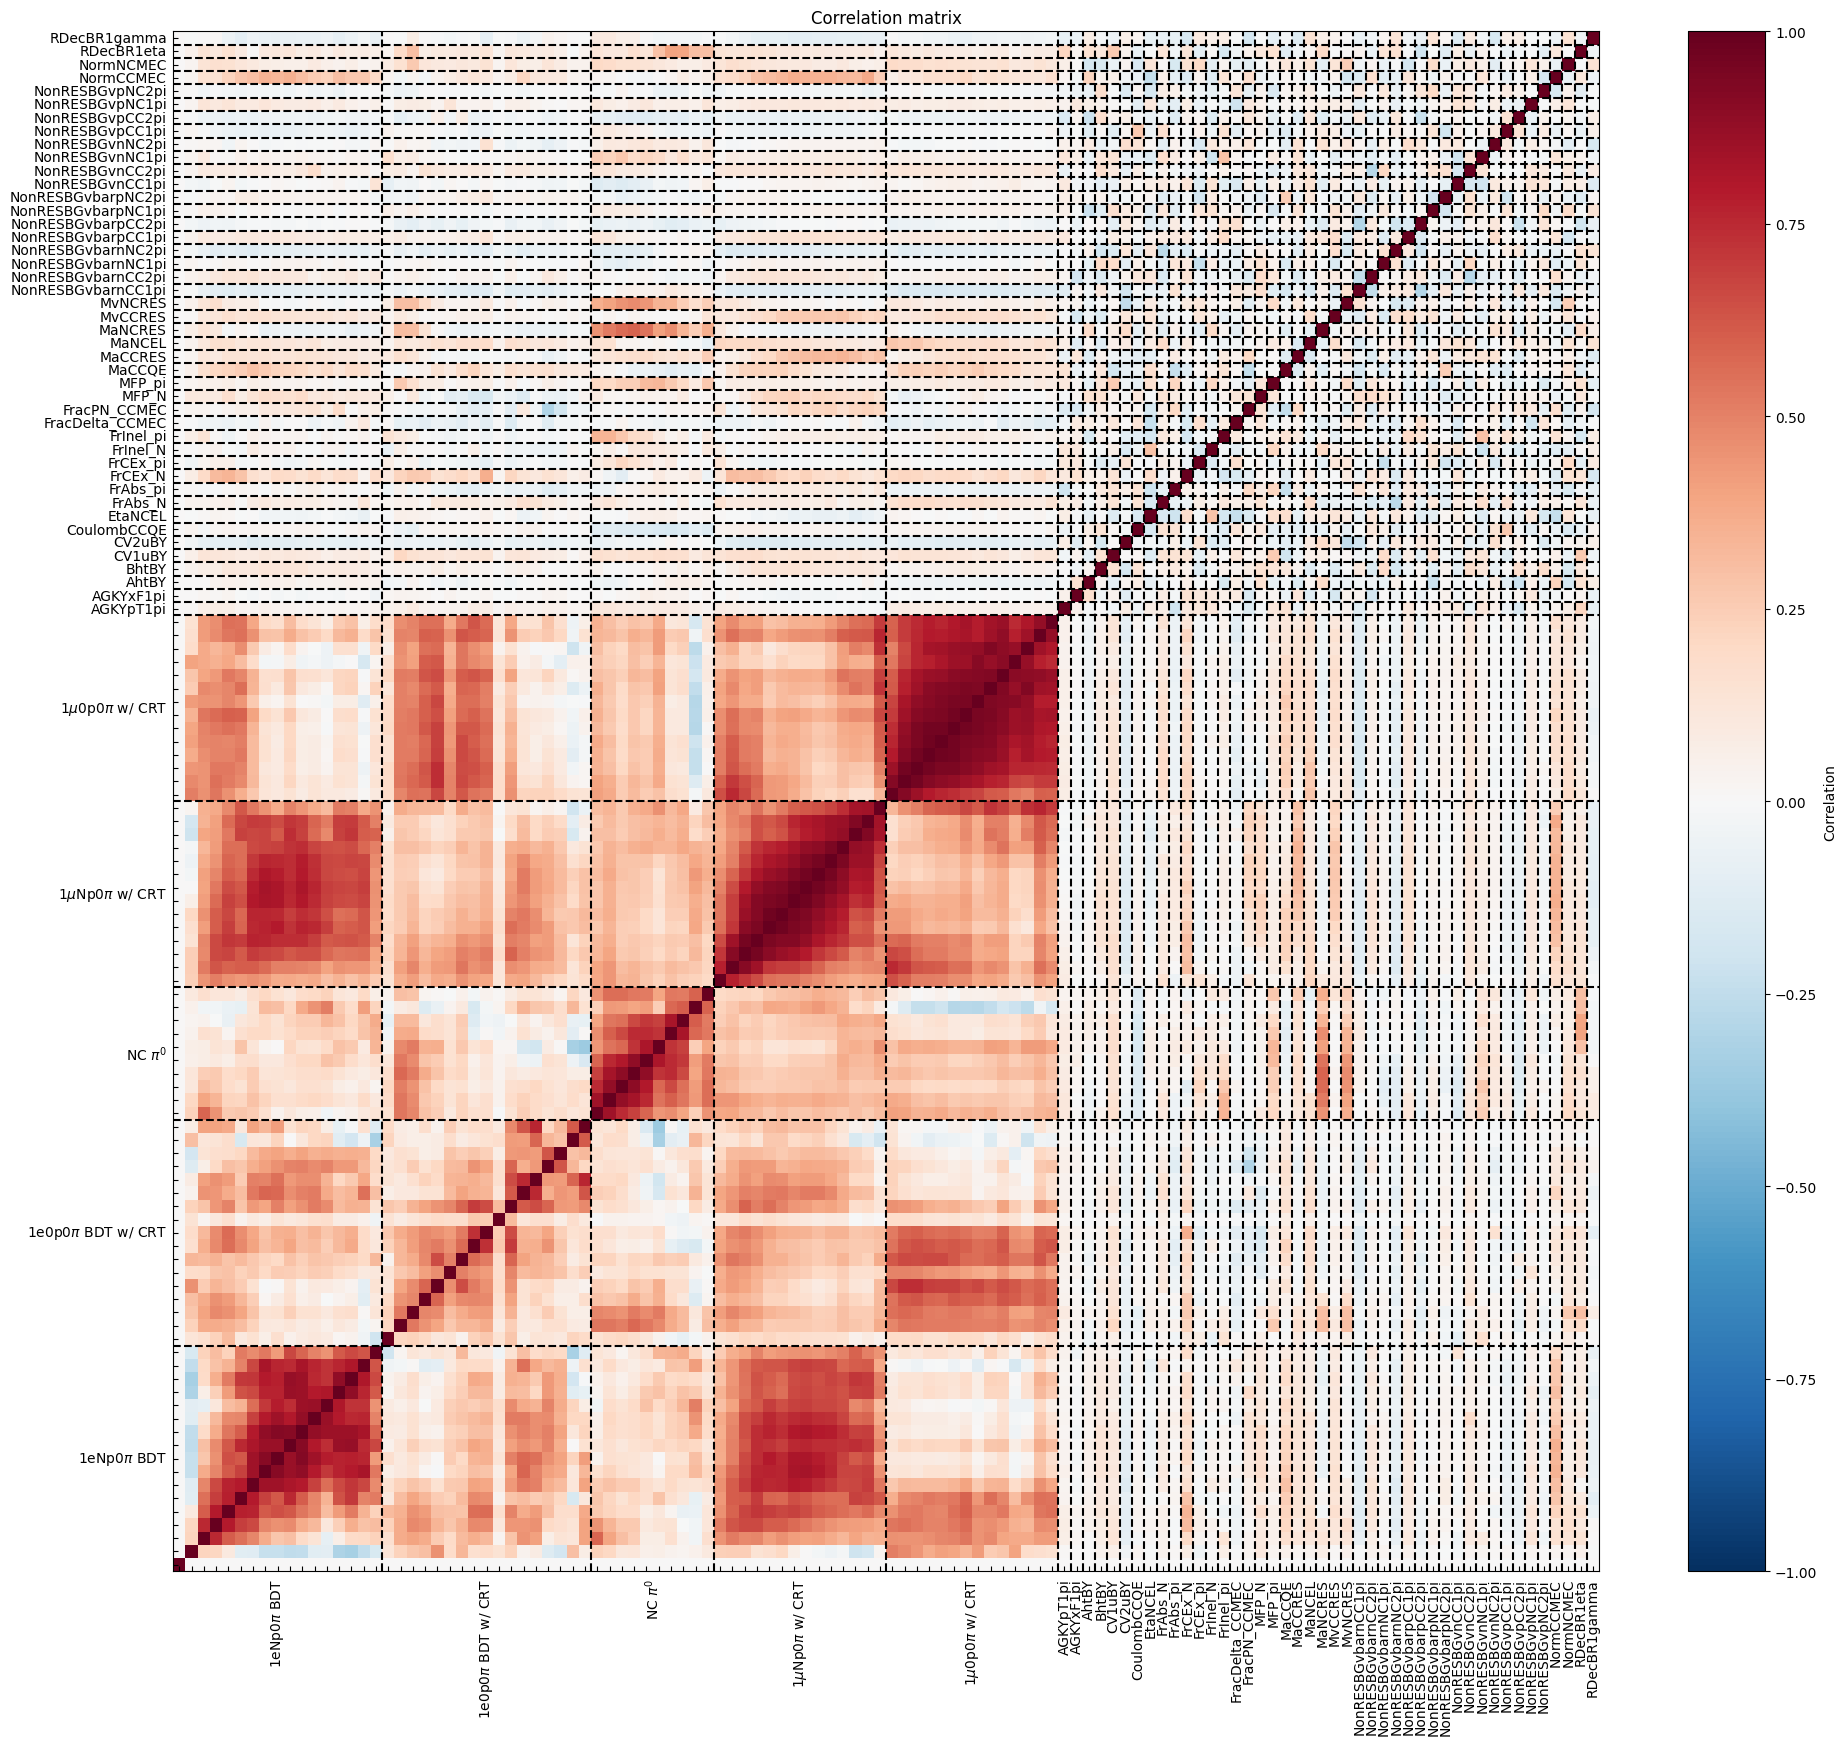

In [31]:
fig, ax = plt.subplots(figsize=(23, 20))
joint_total_prediction.draw_covariance_matrix(ax=ax, label_rotations={"x": 90, "y": 0}, use_variable_label=False)
fig.savefig("genie_knob_plots/joint_covariance_matrix_all_channels.pdf", bbox_inches='tight')
fig.savefig("genie_knob_plots/joint_covariance_matrix_all_channels.png", bbox_inches='tight', dpi=200)

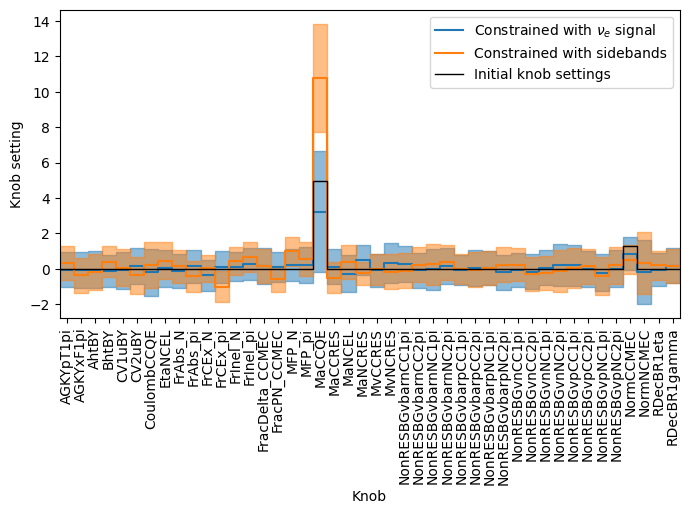

In [32]:
signal_channels = signal_binning.channels
sideband_channels = ncpi0_binning.channels + numu_binning.channels
knob_channels = knob_histogram.binning.channels

joint_hist_constrained_with_signal = joint_total_prediction.update_with_measurement(data_histogram[signal_channels])
joint_hist_constrained_with_sidebands = joint_hist_constrained_with_signal.update_with_measurement(data_histogram[sideband_channels])

fig, ax = plt.subplots(figsize=(8, 4))
joint_hist_constrained_with_signal[knob_channels].draw(ax=ax, label="Constrained with $\\nu_e$ signal", show_channel_labels=False, show_channel_dividers=False, allow_negative=True)
joint_hist_constrained_with_sidebands[knob_channels].draw(ax=ax, label="Constrained with sidebands", show_channel_labels=False, show_channel_dividers=False, allow_negative=True)

knob_histogram.draw(ax=ax, label="Initial knob settings", show_channel_labels=False, color="k", lw=1, show_errors=False, show_channel_dividers=False, allow_negative=True)

ax.legend(loc="upper right")
ax.set_xticks(np.arange(len(knob_channels)) + 0.5)
ax.set_xticklabels(knob_histogram_generator.knob_names, rotation=90)
ax.set_xlabel("Knob")
ax.set_ylabel("Knob setting")

fig.savefig("genie_knob_plots/knob_constrained_with_signal_and_sidebands.pdf", bbox_inches='tight')
# also save PNG version
fig.savefig("genie_knob_plots/knob_constrained_with_signal_and_sidebands.png", bbox_inches='tight')

Nominal value of NormCCMEC: 1.31189, sigma: 0.9687560047390498


Text(0, 0.5, 'Knob setting')

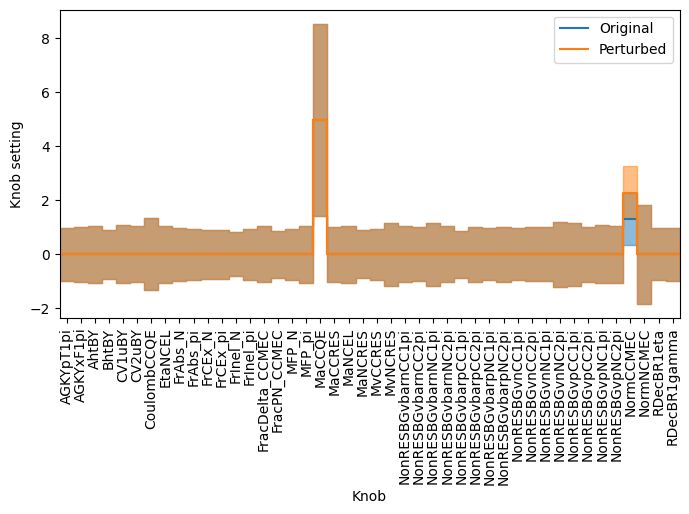

In [71]:
# Compare signal and sideband histograms when perturbing individual knobs by one sigma
knob_name = "NormCCMEC"
knob_histogram_perturbed = knob_histogram.copy()
knob_nominal = knob_histogram_perturbed[knob_name].bin_counts[0]
knob_sigma = knob_histogram_perturbed[knob_name].std_devs[0]
print(f"Nominal value of {knob_name}: {knob_nominal}, sigma: {knob_sigma}")

knob_bin_index = knob_histogram_perturbed.binning._idx_channel(knob_name)
updated_bin_counts = knob_histogram_perturbed.bin_counts  # This is a copy by design
updated_bin_counts[knob_bin_index] = knob_nominal + 1 * knob_sigma
knob_histogram_perturbed.bin_counts = updated_bin_counts

# Plot original and perturbed knob histograms
fig, ax = plt.subplots(figsize=(8, 4))
knob_histogram.draw(ax=ax, label="Original", show_channel_labels=False, show_channel_dividers=False, allow_negative=True)
knob_histogram_perturbed.draw(ax=ax, label="Perturbed", show_channel_labels=False, show_channel_dividers=False, allow_negative=True)

ax.legend(loc="upper right")
ax.set_xticks(np.arange(len(knob_channels)) + 0.5)
ax.set_xticklabels(knob_histogram_generator.knob_names, rotation=90)
ax.set_xlabel("Knob")
ax.set_ylabel("Knob setting")

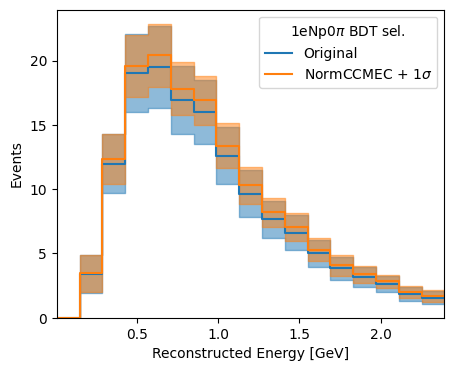

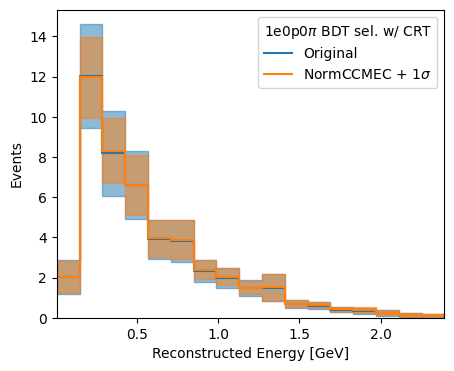

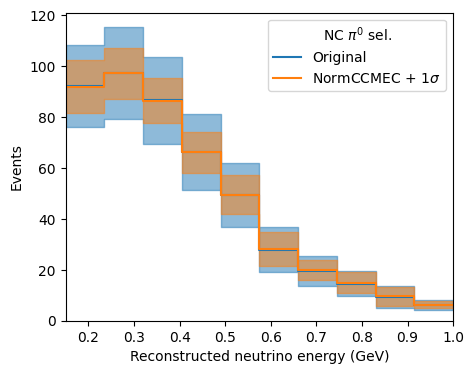

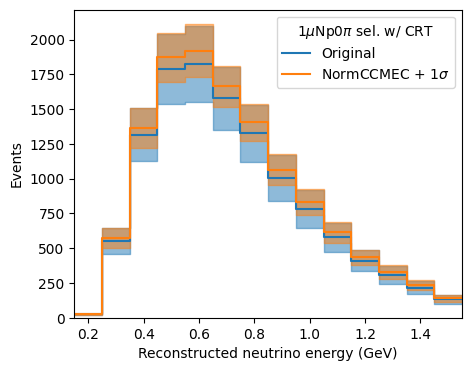

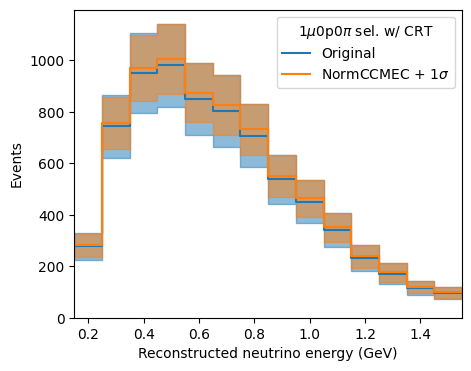

In [72]:
# Use the perturbed knob histogram to update the total prediction
n_knobs = len(knob_histogram.binning.channels)

joint_hist_constrained_with_knobs = joint_total_prediction.update_with_measurement(
    knob_histogram_perturbed,
    # Sinc this is no real data with Poisson fluctuations, the CNP covariance doesn't make sense.
    sideband_cnp_covariance=np.zeros((n_knobs, n_knobs)),
)

for channel in signal_channels + sideband_channels:
    fig, ax = plt.subplots(figsize=(5, 4))
    joint_total_prediction[channel].draw(ax=ax, label="Original")
    joint_hist_constrained_with_knobs[channel].draw(ax=ax, label=f"{knob_name} + 1$\\sigma$")
    ax.legend(loc="upper right", title=joint_total_prediction.binning[channel].selection_tex)
    ax.set_ylim(bottom=0)
    fig.savefig(f"genie_knob_plots/{channel}_knob_perturbation_{knob_name}.pdf", bbox_inches='tight')
    fig.savefig(f"genie_knob_plots/{channel}_knob_perturbation_{knob_name}.png", bbox_inches='tight')